In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'id,has_cactus\n0004be2cfeaba1c0361d39e2b000257b.jpg,1\n000c8a36845c0208e833c79c1bffedd1.jpg,1\n000d1e9a533f62e55c289303b072733d.jpg,1\n0011485b40695e9138e92d0b3fb55128.jpg,1\n0014d7a11e90b62848904c1418fc8cf2.jpg,1\n0017c3c18ddd57a2ea6f9848c79d83d2.jpg,1\n002134abf28af54575c18741b89dd2a4.jpg,0\n0024320f43bdd490562246435af4f90b.jpg,0\n002930423b9840e67e5a54afd4768a1e.jpg,1\n00351838ebf6dff6e53056e00a1e307c.jpg,1\n003519dd841a97ed16481fa0657df04d.jpg,1\n003bb64852016d9c87871ddd8e25ab03.jpg,0\n003ec9bcef67171ba49fe4c3b7c80aec.jpg,1\n003eeb9a86e36cd6328c778c15df890d.jpg,1\n0045d0f2aec739370eaefac79ee5b96c.jpg,0\n004fceec9b9b6a31dc9b0540fd69c692.jpg,1\n0051207eb794887c619341090de84b50.jpg,0\n0052d90950c3f08ed778d638a956fd43.jpg,0\n0057728c8522c4881af60c3105b6492e.jpg,0\n005aa32619d179665ecad3b227f8b537.jpg,1\n0062380830fe60c692a148afe64906ac.jpg,0\n00677f0440d465c2a685e33ded9bb729.jpg,1\n006bceec83605c63d844ed160cdbba89.jpg,1\n007a6a49d6049207f1716d1cc0fdf175.jpg,1\n007eba3ed

In [ ]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission.csv


{'sample_submission.csv': b'id,has_cactus\n000940378805c44108d287872b2f04ce.jpg,0.5\n0017242f54ececa4512b4d7937d1e21e.jpg,0.5\n001ee6d8564003107853118ab87df407.jpg,0.5\n002e175c3c1e060769475f52182583d0.jpg,0.5\n0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5\n0038ed6f7417b8275b393307f66cb1e3.jpg,0.5\n0059dfa41de4441fc23b9a4b98ba99cb.jpg,0.5\n0061bd302d735db829418cb90b4e6040.jpg,0.5\n00754573d8c7223e73da553dd43780bd.jpg,0.5\n008d9fce71c8e03a4c9cdd15ea908573.jpg,0.5\n00a36d4d6d152404670276fc983273bc.jpg,0.5\n00b706122b87e0fa275ff59e39d4d94b.jpg,0.5\n00c054da839d5518e59790f7d867f317.jpg,0.5\n00c88441b0510cdb3a6e9b3fa7b632af.jpg,0.5\n00e1e29865202c8ca715b0f14848d577.jpg,0.5\n00e20b0e6d779e7c36cea29710eed88e.jpg,0.5\n00feb0be23ac80f397a55b0ed8502def.jpg,0.5\n01185a1a81bb8041fa5e9c9ada9374eb.jpg,0.5\n0124398c0fcf6d1c92d9800337636b4e.jpg,0.5\n0127044dfc88dfaed0118c8764909800.jpg,0.5\n012c260033e652ab9690ea4bb3f63483.jpg,0.5\n0145b0da83f36fcfe1a1309355154c9f.jpg,0.5\n01723d584648a9c88704625121443d46.

In [ ]:
import os
os.getcwd()
# place the files in your IDE working dicrectory .
#labels = pd.read_csv(r'/aerialcactus/train.csv')
#submission = pd.read_csv(r'/aerialcactus/sample_submission.csv)

labels = pd.read_csv('train.csv')
submission = pd.read_csv('sample_submission.csv')

#train_path = r'/aerialcactus/train/train/'
#test_path = r'/aerialcactus/test/test/'

In [ ]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
labels['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import zipfile
zip_img = zipfile.ZipFile("drive/My Drive/colab data/Aerial_Cactus_Image/test.zip", 'r')
zip_img.extractall(path = 'data/')

In [ ]:
zip_img = zipfile.ZipFile("drive/My Drive/colab data/Aerial_Cactus_Image/train.zip", 'r')
zip_img.extractall(path = 'data/')

In [ ]:
!ls -l

total 844
drwxr-xr-x 4 root root   4096 Sep  2 11:38 data
drwx------ 4 root root   4096 Sep  2 11:37 drive
drwxr-xr-x 1 root root   4096 Aug 27 16:39 sample_data
-rw-r--r-- 1 root root 164014 Sep  2 11:25 sample_submission.csv
-rw-r--r-- 1 root root 682514 Sep  2 11:15 train.csv


In [ ]:
train_path = r'data/train/'
test_path = 'data/test/'

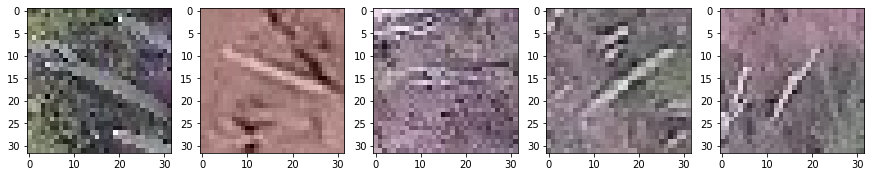

In [ ]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['has_cactus'] == 1]['id'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

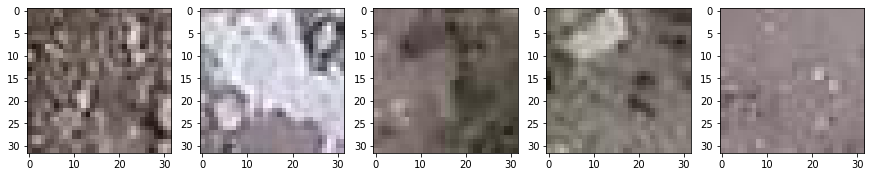

In [ ]:
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(labels[labels['has_cactus'] == 0]['id'][:5]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

In [ ]:
class CactiDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [ ]:
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

In [ ]:
train, valid_data = train_test_split(labels, stratify=labels.has_cactus, test_size=0.2)


In [ ]:
train_data = CactiDataset(train, train_path, train_transform )
valid_data = CactiDataset(valid_data, train_path, valid_transform )
test_data = CactiDataset(submission, test_path, test_transform )

In [ ]:
# Hyper parameters

num_epochs = 35
num_classes = 2
batch_size = 25
learning_rate = 0.001

In [ ]:
# CPU or GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


training images
torch.Size([3, 32, 32])


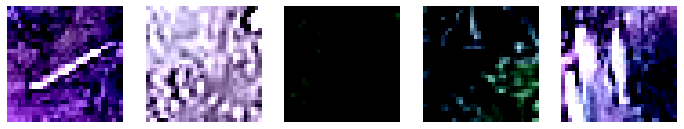

In [ ]:
trainimages, trainlabels = next(iter(train_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    axe1 = axes[i] 
    imshow(trainimages[i], ax=axe1, normalize=False)

print(trainimages[0].size())

In [ ]:
#CNN
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(720, 1024)
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [ ]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=720, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)


In [ ]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [ ]:
%%time
# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        
    # validate-the-model
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target)
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    # print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))


Epoch: 1 	Training Loss: 0.173635 	Validation Loss: 0.088016
Epoch: 2 	Training Loss: 0.097164 	Validation Loss: 0.069422
Epoch: 3 	Training Loss: 0.078542 	Validation Loss: 0.074893
Epoch: 4 	Training Loss: 0.074564 	Validation Loss: 0.063236
Epoch: 5 	Training Loss: 0.065254 	Validation Loss: 0.048079
Epoch: 6 	Training Loss: 0.060474 	Validation Loss: 0.048280
Epoch: 7 	Training Loss: 0.060617 	Validation Loss: 0.045977
Epoch: 8 	Training Loss: 0.053165 	Validation Loss: 0.049527
Epoch: 9 	Training Loss: 0.052889 	Validation Loss: 0.043289
Epoch: 10 	Training Loss: 0.049478 	Validation Loss: 0.062830
Epoch: 11 	Training Loss: 0.049393 	Validation Loss: 0.042961
Epoch: 12 	Training Loss: 0.044979 	Validation Loss: 0.040989
Epoch: 13 	Training Loss: 0.046002 	Validation Loss: 0.041989
Epoch: 14 	Training Loss: 0.041951 	Validation Loss: 0.044007
Epoch: 15 	Training Loss: 0.039427 	Validation Loss: 0.045450
Epoch: 16 	Training Loss: 0.039993 	Validation Loss: 0.083627
Epoch: 17 	Traini

In [ ]:
# test-the-model
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

# Save 
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model: 98.48571428571428 %


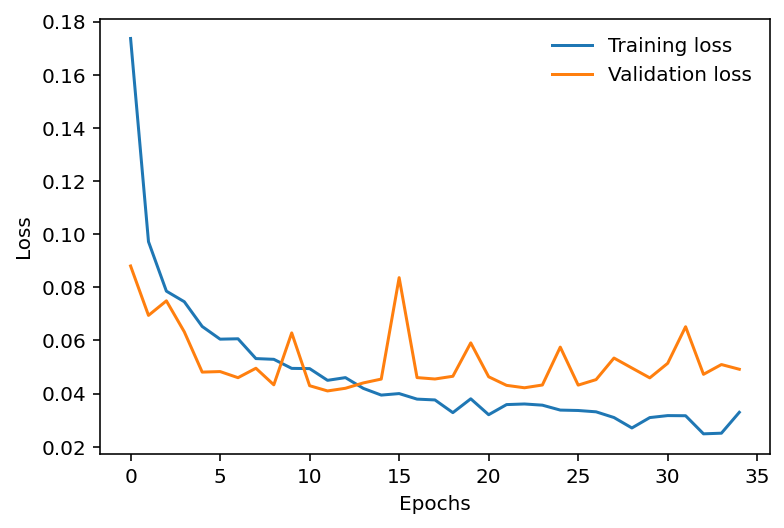

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)

In [ ]:
#prediction for the model
model.eval()  # it-disables-dropout
predictions = []
with torch.no_grad():
  for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      predictions.extend(predicted)

  predictions = torch.stack(predictions).cpu()


In [ ]:
predictions

tensor([1, 1, 0,  ..., 1, 1, 1])

In [ ]:
predictions = predictions.squeeze().tolist()

In [ ]:
sub_df = pd.DataFrame(submission['id'],columns = ['id'])
sub_df['has_cactus'] = predictions
sub_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,0
3,002e175c3c1e060769475f52182583d0.jpg,0
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1


In [ ]:
sub_df.to_csv('CactusCNNTorch.csv',index  = False)